In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langfuse import get_client

langfuse = get_client()
# Verify connection
if langfuse.auth_check():
    print("Langfuse client is authenticated and ready!")
else:
    print("Authentication failed. Please check your credentials and host.")

Langfuse client is authenticated and ready!


In [8]:
from langchain_core.messages import HumanMessage
from agent import build_graph

In [ ]:
graph = build_graph()
# question = "What is the hometown of this year’s 16th overall pick in the NBA draft?"
# messages = [HumanMessage(content=question)]
# messages = graph.invoke({"messages": messages})
# answer = (messages['messages'][-1].content)[14:]

In [17]:
from langfuse.langchain import CallbackHandler
langfuse_handler = CallbackHandler()

In [21]:
question = "What is the hometown of this year’s 16th overall pick in the NBA draft?"
output = graph.invoke(
    {"messages": [HumanMessage(content=question)]},
    config={"callbacks": [langfuse_handler]}
)

In [22]:
print(output['messages'][-1].content)

FINAL ANSWER: Lewisville, TX


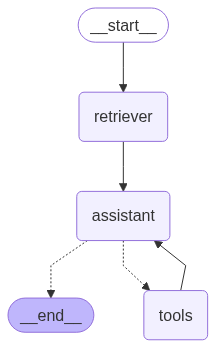

In [23]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))